In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

# KPZ computatinal model

## The disorder matrix

Here i did a simple monte carlo algorithm($x,y$) how saved the value of $x(-1,1)$ when $y$ is inside of the gauss distribution with width $\Delta x$. 

P.S: The $x$ is the potencial value $V$

In [2]:
def value_of_V_gaussiana(Delta_V=0.25): #Give-me the random number between -1 and 1 inside the gaussian curve
    count = True
    while count:
        y, x = random.uniform(0,1), random.uniform(-1,1)
        fx   = np.exp(-x**2/Delta_V)
        if y <= fx:
            count = False
    return x, y

#random.gauss(0, 0.5) 
#np.random.normal(0,0.25,size=(256,256)) this function creat a matrix with gaussian probability

We can use a simple random for $x(-1,1)$ with the same porbability. The difference between these two model can be understood how big is the fluctuation.

In [3]:
def value_of_V_box(): #Give-me the random number between -1 and 1 with the same probability
    return random.uniform(-1,1),random.uniform(0,1)

Now we have two distribution, the first(gaussian probability) has less fluctuations and the square that we have the same probability to achieve randomicaly the potencial -1 until 1.

The visualization of what the function value\_of\_V$(\Delta V=0.25)$ return

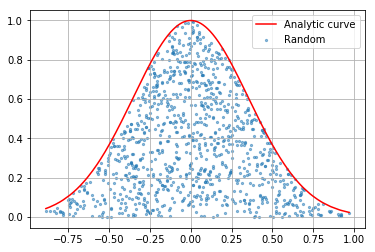

In [4]:
to_plot = np.array([value_of_V_gaussiana(Delta_V=0.25) for x in range(1000)])
plt.scatter(to_plot[:,0],to_plot[:,1], s=5, alpha=0.5, label='Random')
plt.plot(np.sort(to_plot[:,0]),np.exp(-np.sort(to_plot[:,0])**2/0.25), 'r',label='Analytic curve')
plt.legend()
plt.grid()
plt.show()

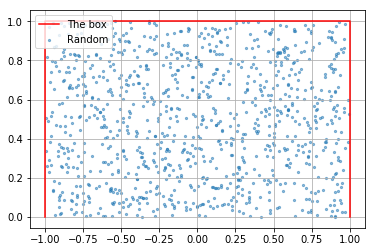

In [5]:
# Only to campere the diference of the values of potencial
to_plot = np.array([value_of_V_box() for x in range(1000)])
plt.scatter(to_plot[:,0],to_plot[:,1], s=5, alpha=0.5, label='Random')
plt.plot([-1,-1,1,1],[0,1,1,0], 'r',label='The box')
plt.legend()
plt.grid()
plt.show()

Now we can create the disorder matriz.

I'll use \_box in the end of the functions for the potencial given with the same probability.

P.S: I didn't use the functions above, they are ilustrative. i've used "random.gauss(0, 0.25)" and "random.uniform(-1,1)" because is faster than my cod

In [6]:
def disorder_matrix_of_V(L): 
    M = np.zeros((L,L))
    for i in range(L):
        for j in range(L):
            M[i,j] = random.gauss(0, 0.25)
    return M
disorder_matrix_of_V(5)

def disorder_matrix_of_V_box(L):
    M = np.zeros((L,L))
    for i in range(L):
        for j in range(L):
            M[i,j] = random.uniform(-1,1)
    return M

The histogram from the disorderes matrix

4.447650194168091


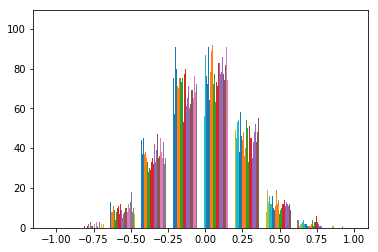

In [7]:
ini = time.time()
plt.hist(disorder_matrix_of_V(256))
end = time.time()
print(end-ini)
plt.show()

4.0999438762664795


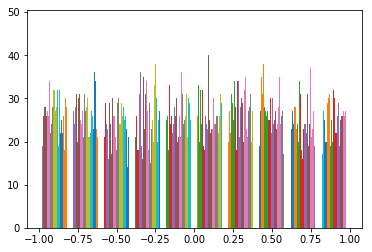

In [8]:
ini = time.time()
plt.hist(disorder_matrix_of_V_box(256))
end = time.time()
print(end-ini)
plt.show()

## One path(P)  - Just an exemplo

The random\_path is an exemple how to create a polymer how start at position $(0,0)$ and finish in position $(L-1,L-1)$. The first $while$ stops when the growth reach the extremes of the disorder matriz if this position is differente of the position $(L-1,L-1)$ the second goes in straight line until reach there.

In [9]:
def random_path(L):
    M_potential = disorder_matrix_of_V(L)
    V , next_step = [M_potential[0,0]]  ,  [0,0] #the initial condition
    
    count = True
    while count == True:
        next_step += (random.choice([(0,1),(1,0)]) + np.array([0,0]))
        if next_step[0] < L and next_step[1] < L:
            V.append(M_potential[next_step[0],next_step[1]])
        else:
            count = False
    
    while V[-1] != M_potential[-1,-1]:
        if next_step[0] > next_step[1]:
            next_step[1] += 1
            V.append(M_potential[L-1,next_step[1]])
        else:
            next_step[0] += 1
            V.append(M_potential[next_step[0],L-1])
                
    return V
random_path(3)

[-0.03677998119478481,
 0.44052312866641286,
 0.4011169527332378,
 0.3216166922114653,
 -0.32531546420532564]

Now we can calculate the energy of the polymer using
$$ E_V(P) = \sum_{(i,j)\in P}V[i,j],$$
and in the canonical ensemble we can calculate the Boltzmann weight 
$$ w_V(P) =e^{-E_V(P)/T} = e^{1/T\sum_{(i,j)\in P}V[i,j] } = \prod_{(i,j)\in P}e^{V[i,j]/T }.$$

In [10]:
def energy_boltzweight_of_1Path(L, T=15):
    path = random_path(L)
    energy = sum(path)
    boltzweight = np.exp(-energy/T)
    return 'Energy:',energy, 'Boltzweight:', boltzweight
energy_boltzweight_of_1Path(L=50, T=15)

('Energy:', -1.4407282713237382, 'Boltzweight:', 1.1008125087087537)

# The Partition Function

Now we can calculate the partition function that is given by the all possible polymers path($P$) probability
$$ Z(V) = \sum_P w_V(P)$$
Ex: take a matrix with $L=2$. For this situation 
$$Z(V)= w_V(P_1) + w_V(P_2),$$ where 
$$w_V(P_1) =e^{-E_V(P_1)/T}= e^{-(V(0,0)+V(0,1)+V(1,1))/T}= e^{-(V(0,0)+V(0,1))/T}e^{V(1,1)/T}$$ and 
$$w_V(P_2) =e^{-E_V(P_2)/T}= e^{-(V(0,0)+V(1,0)+V(1,1))/T}= e^{-(V(0,0)+V(1,0))/T}e^{V(1,1)/T}.$$
The partition funtion is
$$Z(1,1)= (e^{-(V(0,0)+V(0,1))/T} + e^{-(V(0,0)+V(1,0))/T}) e^{V(1,1)/T}$$
thus
$$Z(1,1)= (Z(0,1) + Z(1,0)) e^{V(1,1)/T}$$
Generalize this aproach for $i,j$ we have
$$Z(i,j)= (Z(i-1,j) + Z(i,j-1)) e^{V(i,j)/T}$$

This condition is valid because the polymer only growth "upward" that is it can't back in the cell.

In [11]:
def partition_function_V_box(L, T): 
    M_potential, M_partfunc  = disorder_matrix_of_V_box(L) , np.zeros((L,L))
    
    M_partfunc[0,0] = np.exp(- (M_potential[0,0]/T)) #Initial Condition cell(0,0)

    for j in range(L): # "Boundary" condition. Get straight in line and column. we can use that because in this 
                       # situation the position has only one contribuition.
        if j-1 >= 0:
            M_partfunc[j,0] = (M_partfunc[j-1,0] )* np.exp(- (M_potential[j,0]/T))
            M_partfunc[0,j] = (M_partfunc[0,j-1])* np.exp(- (M_potential[0,j]/T))        
    
    ###############################################################################
    
    l = L-2 #condition of the second "for". 
    #These "fors" acting in a streight line and column. 
    for i in [x+1 for x in range(L-2)]:
        M_partfunc[i,i] = (M_partfunc[i-1,i] + M_partfunc[i,i-1] ) * np.exp(- (M_potential[i,i]/T))
        for j in [x+1+i for x in range(l)]: #for each i this vector become smaller by 1 and the first therme incrise by 1
            M_partfunc[i,j] = ( M_partfunc[i-1,j] + M_partfunc[i,j-1] ) * np.exp(- M_potential[i,j]/T)
            M_partfunc[j,i] = ( M_partfunc[j-1,i] + M_partfunc[j,i+1] ) * np.exp(- M_potential[j,i]/T)
        l -=1
        
    M_partfunc[L-1,L-1] = (M_partfunc[L-2,L-1] + M_partfunc[L-1,L-2]) * np.exp(- (M_potential[L-1,L-1] ) )#final therme 
    return M_partfunc[-1,-1]

In [12]:
def partition_function(L, T): 
    M_potential, M_partfunc  = disorder_matrix_of_V(L) , np.zeros((L,L))
    
    M_partfunc[0,0] = np.exp(- (M_potential[0,0]/T)) 
    for j in range(L):
        if j-1 >= 0:
            M_partfunc[j,0] = (M_partfunc[j-1,0] )* np.exp(- (M_potential[j,0]/T))
            M_partfunc[0,j] = (M_partfunc[0,j-1])* np.exp(- (M_potential[0,j]/T))        
    ###############################################################################
    l = L-2 
    for i in [x+1 for x in range(L-2)]:
        M_partfunc[i,i] = (M_partfunc[i-1,i] + M_partfunc[i,i-1] ) * np.exp(- (M_potential[i,i]/T))
        for j in [x+1+i for x in range(l)]: #for each i this vector become smaller by 1 and the first therme incrise by 1
            M_partfunc[i,j] = ( M_partfunc[i-1,j] + M_partfunc[i,j-1] ) * np.exp(- M_potential[i,j]/T)
            M_partfunc[j,i] = ( M_partfunc[j-1,i] + M_partfunc[j,i+1] ) * np.exp(- M_potential[j,i]/T)
        l -=1
        
    M_partfunc[L-1,L-1] = (M_partfunc[L-2,L-1] + M_partfunc[L-1,L-2]) * np.exp(- (M_potential[L-1,L-1] ) )#final therme 
    return M_partfunc[-1,-1]

In [13]:
def average_partition_function_V_box(L,T,accuracy):
    Zs = [partition_function_V_box(L, T) for n in range(accuracy)]
    Zbar = sum(Zs)/accuracy
    return Zs, Zbar

def H_function_V_box(L,T,accuracy):
    Zs_Zbar = average_partition_function_V_box(L,T,accuracy)
    Zs , Zbar, H_i  = Zs_Zbar[0], Zs_Zbar[1], np.zeros(accuracy)
    for i,j in enumerate(Zs):
        H_i[i] = np.log(j/Zbar) 
    return H_i

In [14]:
def average_partition_function(L,T,accuracy):
    Zs = [partition_function(L, T) for n in range(accuracy)]
    Zbar = sum(Zs)/accuracy
    return Zs, Zbar

def H_function(L,T,accuracy):
    Zs_Zbar = average_partition_function(L,T,accuracy)
    Zs , Zbar, H_i = Zs_Zbar[0], Zs_Zbar[1], np.zeros(accuracy)
    for i,j in enumerate(Zs):
        H_i[i] = np.log(j/Zbar) 
    return H_i

## The plot of V gaussian

$T^4 = \frac{2L}{t}$ and $t=1/16$, thus $T = (32L)^{1/4}$

In [15]:
i1 = time.time()
H32 = H_function(32,(32*32)**(1/4),int(10e3))
e1 = time.time()
print(e1-i1, 'T = ', (32*32)**(1/4))
i1 = time.time()
H64 = H_function(64,(32*64)**(1/4),int(10e3))
e1 = time.time()
print(e1-i1, 'T = ', (32*64)**(1/4))
i1 = time.time()
H128 = H_function(128,(32*128)**(1/4),int(10e3))
e1 = time.time()
print(e1-i1, 'T = ', (32*128)**(1/4))
i1 = time.time()
H256 = H_function(256,(32*256)**(1/4),int(10e2))
e1 = time.time()
print(e1-i1, 'T = ', (32*256)**(1/4))

45.26814007759094 T =  5.656854249492381


KeyboardInterrupt: 

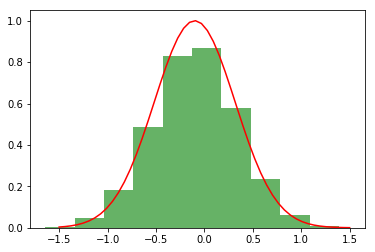

In [16]:
X = np.linspace(-1.5,1.5)
plt.hist(H32,density=True, facecolor='g', alpha=0.6)
plt.plot(X,np.exp(-np.sort(X+1/10)**2/0.35), 'r')
plt.show()

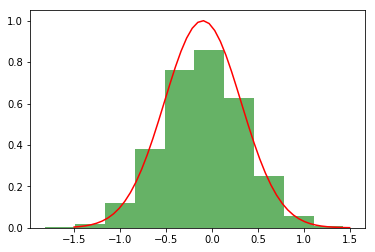

In [17]:
X = np.linspace(-1.5,1.5)
plt.hist(H64,density=True, facecolor='g', alpha=0.6)
plt.plot(X,np.exp(-np.sort(X+1/10)**2/0.35), 'r')
plt.show()

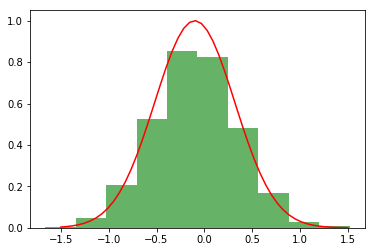

In [18]:
X = np.linspace(-1.5,1.5)
plt.hist(H128,density=True, facecolor='g', alpha=0.6)
plt.plot(X,np.exp(-np.sort(X+1/10)**2/0.35), 'r')
plt.show()

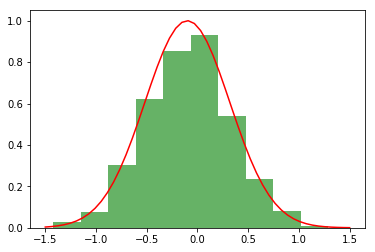

In [20]:
X = np.linspace(-1.5,1.5)
plt.hist(H256,density=True, facecolor='g', alpha=0.6)
plt.plot(X,np.exp(-np.sort(X+1/10)**2/0.35), 'r')
plt.show()

## The plot of V box

In [21]:
i1 = time.time()
H32_box = H_function_V_box(32,(32*32)**(1/4),int(10e3))
e1 = time.time()
print(e1-i1, 'T = ',(32*32)**(1/4))
i1 = time.time()
H64_box = H_function_V_box(64,(32*64)**(1/4),int(10e3))
e1 = time.time()
print(e1-i1, 'T = ',(32*54)**(1/4))
i1 = time.time()
H128_box = H_function_V_box(128,(32*128)**(1/4),int(10e3))
e1 = time.time()
print(e1-i1, 'T = ',(32*128)**(1/4))
i1 = time.time()
H256_box = H_function_V_box(256,(32*256)**(1/4),int(10e2))
e1 = time.time()
print(e1-i1, 'T = ',(32*256)**(1/4))

44.87800693511963 T =  5.656854249492381
163.12702322006226 T =  6.4474195909412515
669.9123530387878 T =  8.0
260.22658824920654 T =  9.513656920021768


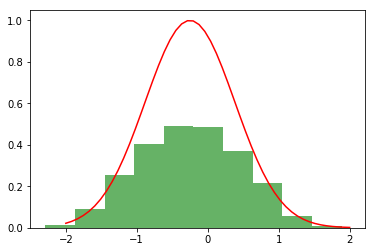

In [22]:
X = np.linspace(-2,2)
plt.hist(H32_box,density=True, facecolor='g', alpha=0.6)
plt.plot(X,np.exp(-np.sort(X+1/4)**2/0.8), 'r')
plt.show()

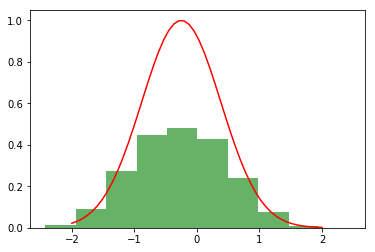

In [23]:
X = np.linspace(-2,2)
plt.hist(H64_box,density=True, facecolor='g', alpha=0.6)
plt.plot(X,np.exp(-np.sort(X+1/4)**2/0.8), 'r')
plt.show()

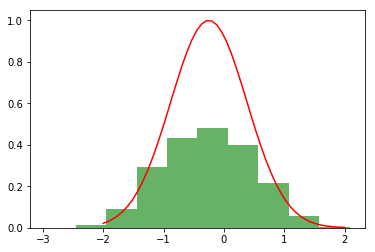

In [24]:
X = np.linspace(-2,2)
plt.hist(H128_box,density=True, facecolor='g', alpha=0.6)
plt.plot(X,np.exp(-np.sort(X+1/4)**2/0.8), 'r')
plt.show()

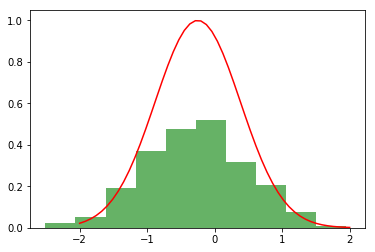

In [25]:
X = np.linspace(-2,2)
plt.hist(H256_box,density=True, facecolor='g', alpha=0.6)
plt.plot(X,np.exp(-np.sort(X+1/4)**2/0.8), 'r')
plt.show()

# THE SIMPLEST WAY

G means gaussian distribution and 0 is the the location.

B means we have a distribution between -1 and 1 with the same probability and 1 is the the location.

In [20]:
def disorder_matrix_G0_B1(L):
    return np.random.normal(0,0.25,size=(L,L)) , np.random.uniform(-1,1,size=(L,L))

In [21]:
def partition_function(L, G_or_B_0or1):
    T = (32*L)**(1/4)
    M_potential, M_partfunc  = disorder_matrix_G0_B1(L)[int(G_or_B_0or1)] , np.zeros((L,L))
    
    M_partfunc[0,0] = np.exp(- (M_potential[0,0]/T)) 
    for j in range(L):
        if j-1 >= 0:
            M_partfunc[j,0] = (M_partfunc[j-1,0  ])* np.exp(-(M_potential[j,0]/T))
            M_partfunc[0,j] = (M_partfunc[0  ,j-1])* np.exp(-(M_potential[0,j]/T))        
    ###############################################################################
    l = L-2 
    for i in [x+1 for x in range(L-2)]:
        M_partfunc[i,i] = (M_partfunc[i-1,i] + M_partfunc[i,i-1] ) * np.exp(- (M_potential[i,i]/T))
        for j in [x+1+i for x in range(l)]: #for each i this vector become smaller by 1 and the first therme incrise by 1
            M_partfunc[i,j] = ( M_partfunc[i-1,j] + M_partfunc[i,j-1] ) * np.exp(- M_potential[i,j]/T)
            M_partfunc[j,i] = ( M_partfunc[j-1,i] + M_partfunc[j,i+1] ) * np.exp(- M_potential[j,i]/T)
        l -=1
        
    M_partfunc[L-1,L-1] = (M_partfunc[L-2,L-1] + M_partfunc[L-1,L-2]) * np.exp(- (M_potential[L-1,L-1] ) )#final therme 
    return M_partfunc[-1,-1]

In [22]:
def average_partition_and_H_function(L, G_or_B_0or1, accuracy):
    Zs = [partition_function(L, G_or_B_0or1) for n in range(accuracy)]
    Zbar = sum(Zs)/accuracy
    H_i = np.zeros(accuracy)
    for i,j in enumerate(Zs):
        H_i[i] = np.log(j/Zbar) 
    return H_i

In [23]:
ini = time.time()

i = time.time()
HG32_1000 = average_partition_and_H_function(32, G_or_B_0or1=0, accuracy=1000)
e = time.time()
print(e-i)
i = time.time()
HG64_1000 = average_partition_and_H_function(64, G_or_B_0or1=0, accuracy=1000)
e = time.time()
print(e-i)
i = time.time()
HG128_1000 = average_partition_and_H_function(128, G_or_B_0or1=0, accuracy=1000)
e = time.time()
print(e-i)
i = time.time()
HG256_1000 = average_partition_and_H_function(256, G_or_B_0or1=0, accuracy=1000)
e = time.time()
print(e-i)

i = time.time()
HB32_1000 = average_partition_and_H_function(32, G_or_B_0or1=1, accuracy=1000)
e = time.time()
print(e-i)
i = time.time()
HB64_1000 = average_partition_and_H_function(64, G_or_B_0or1=1, accuracy=1000)
e = time.time()
print(e-i)
i = time.time()
HB128_1000 = average_partition_and_H_function(128, G_or_B_0or1=1, accuracy=1000)
e = time.time()
print(e-i)
i = time.time()
HB256_1000 = average_partition_and_H_function(256, G_or_B_0or1=1, accuracy=1000)
e = time.time()
print(e-i)

end = time.time()
print('TOTAL' , end-ini)

3.5822677612304688
13.3925199508667
53.13235783576965
203.54989576339722
3.574270248413086
13.249493837356567
53.74138784408569
207.18001079559326
TOTAL 551.4045388698578


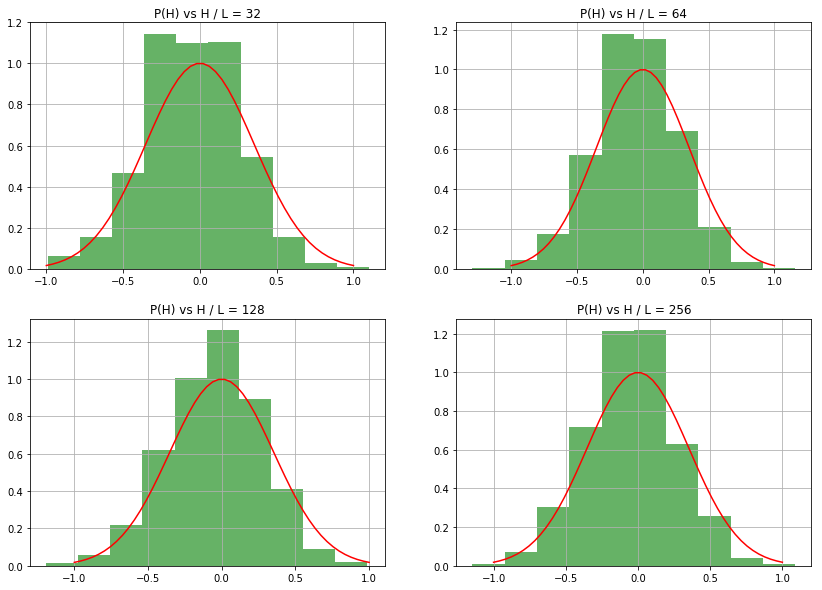

In [24]:
f = plt.figure(figsize=(14,10))
X = np.linspace(-1,1)

ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)    
ax4 = f.add_subplot(224)

ax1.plot(X,np.exp(-np.sort(X)**2/0.25), 'r')
ax2.plot(X,np.exp(-np.sort(X)**2/0.25), 'r')
ax3.plot(X,np.exp(-np.sort(X)**2/0.25), 'r')
ax4.plot(X,np.exp(-np.sort(X)**2/0.25), 'r')
ax1.hist(HG32_1000,density=True, facecolor='g', alpha=0.6)
ax2.hist(HG64_1000,density=True, facecolor='g', alpha=0.6)
ax3.hist(HG128_1000,density=True, facecolor='g', alpha=0.6)
ax4.hist(HG256_1000,density=True, facecolor='g', alpha=0.6)
    
ax1.set_title('P(H) vs H / L = 32')
ax2.set_title('P(H) vs H / L = 64')
ax3.set_title('P(H) vs H / L = 128')
ax4.set_title('P(H) vs H / L = 256')
#plt.legend([ax1, ax2, ax3, ax4],["HHZ 1", "HHN", "HHE", "HHE"])
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

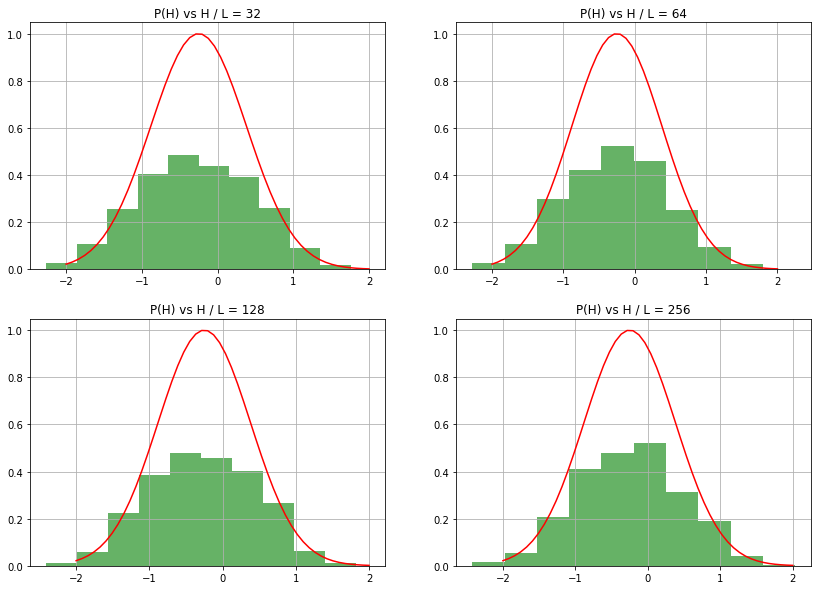

In [25]:
f = plt.figure(figsize=(14,10))
X = np.linspace(-2,2)

ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)    
ax4 = f.add_subplot(224)

ax1.plot(X,np.exp(-np.sort(X+1/4)**2/0.8), 'r')
ax2.plot(X,np.exp(-np.sort(X+1/4)**2/0.8), 'r')
ax3.plot(X,np.exp(-np.sort(X+1/4)**2/0.8), 'r')
ax4.plot(X,np.exp(-np.sort(X+1/4)**2/0.8), 'r')
ax1.hist(HB32_1000,density=True, facecolor='g', alpha=0.6)
ax2.hist(HB64_1000,density=True, facecolor='g', alpha=0.6)
ax3.hist(HB128_1000,density=True, facecolor='g', alpha=0.6)
ax4.hist(HB256_1000,density=True, facecolor='g', alpha=0.6)
    
ax1.set_title('P(H) vs H / L = 32')
ax2.set_title('P(H) vs H / L = 64')
ax3.set_title('P(H) vs H / L = 128')
ax4.set_title('P(H) vs H / L = 256')
#plt.legend([ax1, ax2, ax3, ax4],["HHZ 1", "HHN", "HHE", "HHE"])
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

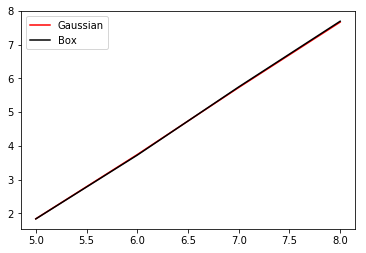

In [33]:
X = np.log2([32,64,128,256])
YG = np.log2([3.5822677612304688,13.3925199508667,53.13235783576965,203.54989576339722])
YB = np.log2([3.574270248413086,13.249493837356567,53.74138784408569,207.18001079559326])
plt.plot(X,YG,'r',label='Gaussian')
plt.plot(X,YB,'k',label='Box')
plt.legend()
plt.show()
